<a href="https://colab.research.google.com/github/quantum-mechanics405/Credit_score_Classification/blob/main/detect_umar_all_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Unzip Folder

In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/Data Set Colab/all_picturs.zip'  # Update this with your zip file path

# Specify the directory where you want to extract the contents
extract_to_directory = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures'  # Update this with your desired extraction path

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the zip file into the specified directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print(f'Extracted contents of {zip_file_path} to {extract_to_directory}')


Extracted contents of /content/drive/MyDrive/Data Set Colab/all_picturs.zip to /content/drive/MyDrive/Data Set Colab/extract_all_pictures


##Detecting One face

In [ ]:
!pip install mtcnn
!pip uninstall -y lz4 joblib
!pip install lz4 joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00
Found existing installation: lz4 4.3.3
Uninstalling lz4-4.3.3:
  Successfully uninstalled lz4-4.3.3
Found existing installation: joblib 1.4.2
Uninstalling joblib-1.4.2:
  Successfully uninstalled joblib-1.4.2
  Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.3 MB/s eta 0:00:00


Isolated face 1 from the image.
Isolated face 2 from the image.


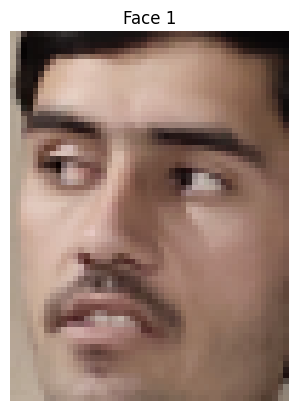

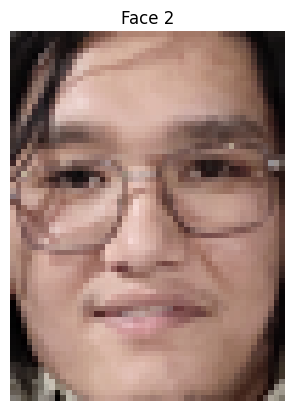

2 faces were isolated from the image.


In [ ]:
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import gc

# Initialize the MTCNN face detector
detector = MTCNN()

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()

        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # If there's no EXIF data or no orientation tag, do nothing
        pass

    return image

def detect_faces_from_image(image_path):
    # Load and correct the orientation of the image
    img = Image.open(image_path)
    img = correct_image_orientation(img)

    # Resize the image to make face detection faster while keeping the aspect ratio
    img.thumbnail((640, 480))

    # Convert the image to RGB format for MTCNN
    img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Detect faces in the image
    faces = detector.detect_faces(img_rgb)

    # Store detected face images in a list
    face_images = []

    # Extract faces if any are detected
    for i, face in enumerate(faces):
        # Get the bounding box for each face
        x, y, width, height = face['box']

        # Crop the face from the image
        face_img = img_rgb[y:y + height, x:x + width]

        # Convert the face to RGB for consistency
        face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

        # Append face image to the list
        face_images.append(face_img_rgb)

        print(f'Isolated face {i + 1} from the image.')

    # Clear variables and collect garbage to free memory
    del img, img_rgb, faces
    gc.collect()

    return face_images

# Usage
image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG_20230519_194530.jpg'  # Replace with the actual path to the image
faces = detect_faces_from_image(image_path)

# Display the faces if you want
import matplotlib.pyplot as plt

for i, face in enumerate(faces):
    plt.imshow(face)
    plt.title(f"Face {i + 1}")
    plt.axis('off')
    plt.show()

print(f"{len(faces)} faces were isolated from the image.")




```
# This is formatted as code
```



##Detecting faces from all images and saving them to folder

In [ ]:
import os
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import gc

# Initialize the MTCNN face detector
detector = MTCNN()

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()

        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # If there's no EXIF data or no orientation tag, do nothing
        pass

    return image

def detect_faces_from_folder(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)
        if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            # Load and correct the orientation of the image
            img = Image.open(image_path)
            img = correct_image_orientation(img)

            # Resize the image to make face detection faster while keeping the aspect ratio
            img.thumbnail((640, 480))

            # Convert the image to RGB format for MTCNN
            img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

            # Detect faces in the image
            faces = detector.detect_faces(img_rgb)

            # Extract and save faces
            for i, face in enumerate(faces):
                # Get the bounding box for each face
                x, y, width, height = face['box']

                # Crop the face from the image
                face_img = img_rgb[y:y + height, x:x + width]

                # Convert the face to RGB for consistency
                face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

                # Save the detected face image
                face_output_path = os.path.join(output_folder, f"{filename.split('.')[0]}_face_{i + 1}.jpg")
                Image.fromarray(face_img_rgb).save(face_output_path)

                print(f'Saved face {i + 1} from {filename} to {face_output_path}')

            # Clear variables and collect garbage to free memory
            del img, img_rgb, faces
            gc.collect()

# Usage
# input_folder = '/content/drive/MyDrive/Data Set Colab/umar_pic'  # Replace with your input folder path
# output_folder = '/content/drive/MyDrive/Data Set Colab/aug_umar_pic'  # Replace with your desired output folder path

detect_faces_from_folder(input_folder, output_folder)


Saved face 1 from IMG_20230512_192521_face_1.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230512_192521_face_1_face_1.jpg
Saved face 1 from IMG_20230512_192522_face_3.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230512_192522_face_3_face_1.jpg
Saved face 1 from IMG_20230512_192555_face_2.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230512_192555_face_2_face_1.jpg
Saved face 1 from IMG_20230512_192607_face_1.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230512_192607_face_1_face_1.jpg
Saved face 1 from IMG_20230519_194504_face_1.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230519_194504_face_1_face_1.jpg
Saved face 1 from IMG_20230519_194530_face_1.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230519_194530_face_1_face_1.jpg
Saved face 1 from IMG_20230519_194546_face_1.jpg to /content/drive/MyDrive/Data Set Colab/aug_umar_pic/IMG_20230519_194546_face_1_face_1.jpg
Saved face 1 

KeyboardInterrupt: 

##Image Augumentation

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def augment_faces(input_folder, output_folder, num_augmented_images=10):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Initialize the ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Iterate through all face images in the input folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)
        if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            # Load the image
            img = Image.open(image_path)
            img_array = np.array(img)

            # Reshape the image for the ImageDataGenerator
            img_array = img_array.reshape((1, ) + img_array.shape)  # Shape (1, height, width, channels)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder,
                                       save_prefix=filename.split('.')[0], save_format='jpg'):
                i += 1
                if i >= num_augmented_images:  # Stop after generating the desired number of augmented images
                    break

# Usage
input_faces_folder = '/content/drive/MyDrive/Data Set Colab/umar_pic'  # Replace with your input folder path
output_augmented_folder = '/content/drive/MyDrive/Data Set Colab/aug_umar_pic'  # Replace with your desired output folder path

augment_faces(input_faces_folder, output_augmented_folder)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def augment_faces(input_folder, output_folder, num_augmented_images=10):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Initialize the ImageDataGenerator for augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Iterate through all face images in the input folder
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)
        if image_path.lower().endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
            # Load the image
            img = Image.open(image_path)
            img_array = np.array(img)

            # Reshape the image for the ImageDataGenerator
            img_array = img_array.reshape((1, ) + img_array.shape)  # Shape (1, height, width, channels)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder,
                                       save_prefix=filename.split('.')[0], save_format='jpg'):
                i += 1
                if i >= num_augmented_images:  # Stop after generating the desired number of augmented images
                    break

# Usage
input_faces_folder = '/content/drive/MyDrive/Data Set Colab/not umar'  # Replace with your input folder path
output_augmented_folder = '/content/drive/MyDrive/Data Set Colab/aug_not_umar'  # Replace with your desired output folder path

augment_faces(input_faces_folder, output_augmented_folder)


In [ ]:
import os

def count_files_in_directory(directory):
    try:
        files = os.listdir(directory)
        print(f"Number of files in the directory: {len(files)}")
    except FileNotFoundError:
        print("The specified directory does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the directory you want to count files from
directory_path = '/content/drive/MyDrive/Data Set Colab/not umar'  # Replace with the actual path

# Call the function to count files
count_files_in_directory(directory_path)


Number of files in the directory: 195


##Preprocessing the image for training

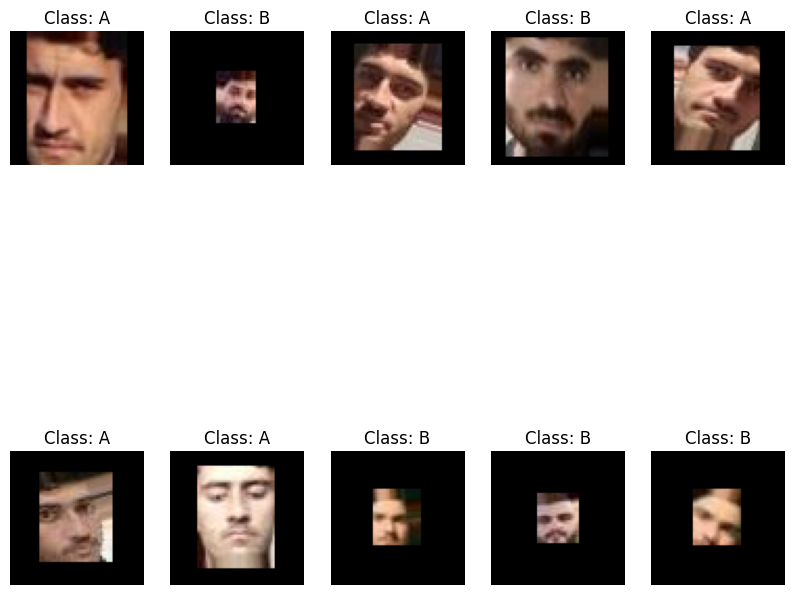

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load and Preprocess Images
def load_and_preprocess_images(folder_A, folder_B, target_size=(64, 64)):
    images = []
    labels = []

    # Process images in class A
    for filename in os.listdir(folder_A):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_A, filename)
            img = Image.open(img_path).convert("RGB")
            img = resize_with_aspect_ratio(img, target_size)
            images.append(np.array(img))
            labels.append(0)  # Label 0 for class A

    # Process images in class B
    for filename in os.listdir(folder_B):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_B, filename)
            img = Image.open(img_path).convert("RGB")
            img = resize_with_aspect_ratio(img, target_size)
            images.append(np.array(img))
            labels.append(1)  # Label 1 for class B

    # Shuffle images and labels together
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images[:], labels[:] = zip(*combined)

    return np.array(images), np.array(labels)

def resize_with_aspect_ratio(img, target_size):
    img.thumbnail(target_size, Image.LANCZOS)  # Updated to LANCZOS
    new_img = Image.new("RGB", target_size, (0, 0, 0))
    new_img.paste(img, ((target_size[0] - img.width) // 2, (target_size[1] - img.height) // 2))
    return new_img

# Step 2: Split Dataset
def split_dataset(images, labels, val_size=0.05, test_size=0.1):
    # First split off the test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(images, labels, test_size=test_size, random_state=42)
    # Then split the remaining data into training and validation sets
    val_split = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_split, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Path variables
folder_A = '/content/drive/MyDrive/Data Set Colab/aug_umar_pic'  # Adjust with your path
folder_B = '/content/drive/MyDrive/Data Set Colab/aug_not_umar'  # Adjust with your path

# Load images directly from the specified folders
images, labels = load_and_preprocess_images(folder_A, folder_B)

# Split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(images, labels)

# Show first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title("Class: " + ("A" if y_train[i] == 0 else "B"))
    plt.axis('off')
plt.show()


In [ ]:
X_train.shape

(2464, 64, 64, 3)

In [ ]:
X_test.shape

(290, 64, 64, 3)

In [ ]:
X_val.shape

(145, 64, 64, 3)

In [ ]:
labels[70:80]

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

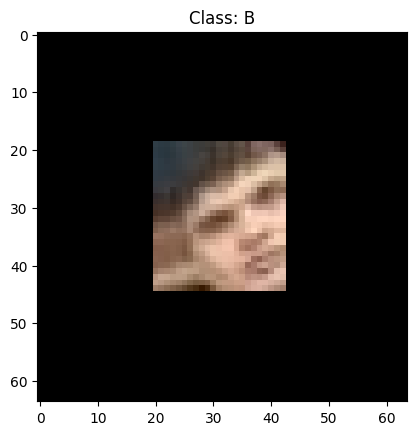

In [ ]:
i=71
plt.imshow(images[i])
plt.title("Class: " + ("A" if labels[i] == 0 else "B"))
plt.show()

##Training the model

Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 262ms/step - accuracy: 0.6242 - loss: 3.7240 - val_accuracy: 0.6414 - val_loss: 0.6198
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.6769 - loss: 0.5901 - val_accuracy: 0.7448 - val_loss: 0.5152
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 274ms/step - accuracy: 0.7513 - loss: 0.5147 - val_accuracy: 0.7241 - val_loss: 0.5331
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 239ms/step - accuracy: 0.7515 - loss: 0.4687 - val_accuracy: 0.8069 - val_loss: 0.4176
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.8126 - loss: 0.3977 - val_accuracy: 0.8483 - val_loss: 0.3629
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 235ms/step - accuracy: 0.8402 - loss: 0.3581 - val_accuracy: 0.7172 - val_loss: 0.5369
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.8320 - loss: 0.3716 - val_accuracy: 0.8897 - val_loss: 0.3121
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - accuracy: 0.8787 - loss: 0.2761 - val_accu

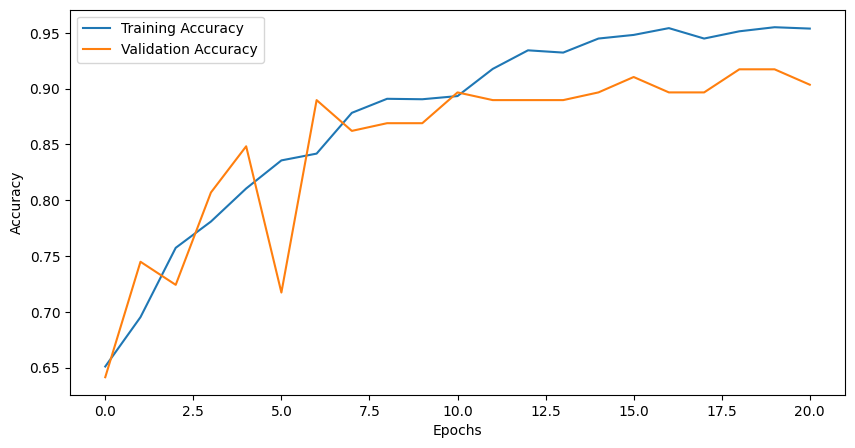

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Define the CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

# Step 2: Compile the Model
input_shape = (64, 64, 3)  # Image shape after resizing
model = create_cnn_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.0009),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 4: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# (Optional) Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


###Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


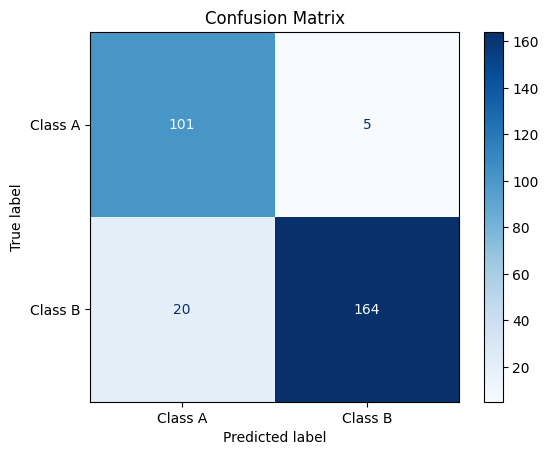

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 2: Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class A", "Class B"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


##Save the Model

In [ ]:
# Step 1: Save the model
model.save('trained_cnn_model_on_umar.h5')

##Loading the Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/drive/MyDrive/Data Set Colab/trained_cnn_model_on_umar.h5')

# You can now use loaded_model for predictions
# Example: loaded_model.predict(new_data)


##Classifying single Picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


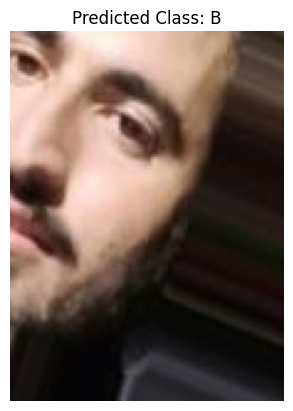

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(64, 64)):
    # Load and resize the image to target_size
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)

    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
    return img_array


def predict_image_class(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    prediction = loaded_model.predict(img_array)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]  # Convert to binary class

    return predicted_class

def resize_with_aspect_ratio(image, target_size):
    # Calculate the aspect ratio and resize image while maintaining it
    img_ratio = image.width / image.height
    target_ratio = target_size[0] / target_size[1]

    if img_ratio > target_ratio:
        # Width is the constraining dimension
        new_width = target_size[0]
        new_height = int(new_width / img_ratio)
    else:
        # Height is the constraining dimension
        new_height = target_size[1]
        new_width = int(new_height * img_ratio)

    return image.resize((new_width, new_height), Image.LANCZOS)

# Your existing functions here

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/Data Set Colab/aug_not_umar/IMG-20221113-WA0000_face_1_0_1834.jpg'  # Replace with the actual image path

# Predict the class of the image
predicted_class = predict_image_class(image_path)

# Display the image and the prediction
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {'A' if predicted_class == 0 else 'B'}")
plt.axis('off')
plt.show()


##Detecting faces from given Image and show faces

Isolated face 1 from the image.
Isolated face 2 from the image.


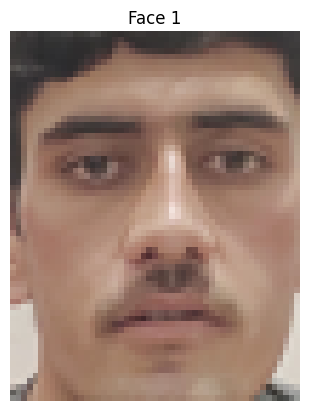

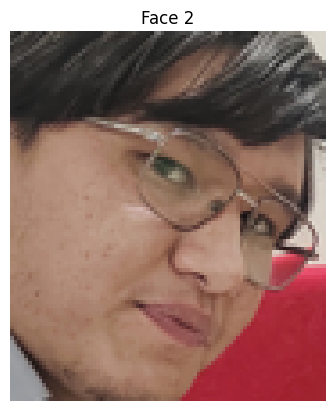

2 faces were isolated from the image.


In [ ]:
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import gc

# Initialize the MTCNN face detector
detector = MTCNN()

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()

        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # If there's no EXIF data or no orientation tag, do nothing
        pass

    return image

def detect_faces_from_image(image_path):
    # Load and correct the orientation of the image
    img = Image.open(image_path)
    img = correct_image_orientation(img)

    # Resize the image to make face detection faster while keeping the aspect ratio
    img.thumbnail((640, 480))

    # Convert the image to RGB format for MTCNN
    img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    # Detect faces in the image
    faces = detector.detect_faces(img_rgb)

    # Store detected face images in a list
    face_images = []

    # Extract faces if any are detected
    for i, face in enumerate(faces):
        # Get the bounding box for each face
        x, y, width, height = face['box']

        # Crop the face from the image
        face_img = img_rgb[y:y + height, x:x + width]

        # Convert the face to RGB for consistency
        face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

        # Append face image to the list
        face_images.append(face_img_rgb)

        print(f'Isolated face {i + 1} from the image.')

    # Clear variables and collect garbage to free memory
    del img, img_rgb, faces
    gc.collect()

    return face_images

# Usage
image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG_20231104_210207.jpg'  # Replace with the actual path to the image
faces = detect_faces_from_image(image_path)

# Display the faces if you want
import matplotlib.pyplot as plt

for i, face in enumerate(faces):
    plt.imshow(face)
    plt.title(f"Face {i + 1}")
    plt.axis('off')
    plt.show()

print(f"{len(faces)} faces were isolated from the image.")


##assign the detected faces to list

##Umar in the Picture or not

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


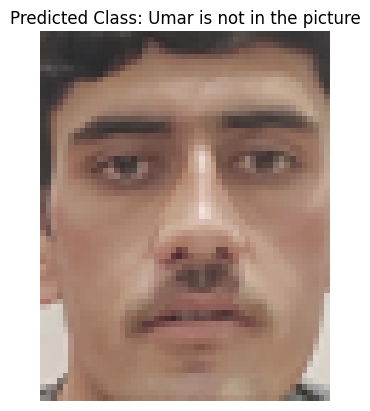

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


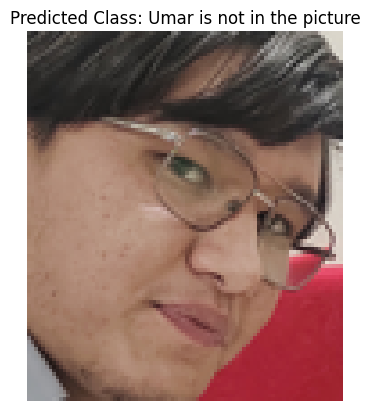

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure you have this imported for any necessary cv2 functions.

def preprocess_image(image, target_size=(64, 64)):
    # Convert NumPy array back to PIL Image if needed
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Resize the image to target_size
    img = image.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
    return img_array

def predict_image_class(image):
    # Preprocess the image
    img_array = preprocess_image(image)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]  # Convert to binary class

    return predicted_class

# Iterate through each image in the faces list and classify
for i, face in enumerate(faces):
    # Since `faces` contains NumPy arrays, we can directly use them in `predict_image_class`.
    predicted_class = predict_image_class(face)

    # Display the image and the prediction
    plt.imshow(face)  # `face` is already in RGB format
    plt.title(f"Predicted Class: {'Umar is in the picture' if predicted_class == 0 else 'Umar is not in the picture'}")
    plt.axis('off')
    plt.show()


##

array([[[ 69,  65,  63],
        [ 63,  59,  58],
        [ 58,  54,  54],
        ...,
        [ 62,  60,  61],
        [ 61,  59,  61],
        [ 64,  62,  63]],

       [[ 66,  62,  61],
        [ 57,  53,  52],
        [ 57,  54,  55],
        ...,
        [ 59,  57,  58],
        [ 61,  59,  60],
        [ 64,  62,  63]],

       [[ 60,  56,  55],
        [ 56,  55,  53],
        [ 56,  55,  55],
        ...,
        [ 60,  57,  58],
        [ 62,  60,  59],
        [ 62,  60,  60]],

       ...,

       [[182, 171, 165],
        [147, 141, 135],
        [138, 128, 128],
        ...,
        [167, 165, 163],
        [179, 176, 172],
        [194, 190, 184]],

       [[ 96,  93,  90],
        [125, 123, 119],
        [109,  97,  94],
        ...,
        [139, 138, 135],
        [162, 162, 160],
        [160, 160, 158]],

       [[137, 136, 133],
        [132, 129, 128],
        [108,  92,  88],
        ...,
        [ 75,  76,  73],
        [113, 114, 112],
        [151, 153, 149]]], dtype=uint8)
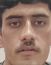

In [ ]:
faces[0]

In [ ]:
img_array = preprocess_image(faces[0])

    # Make prediction
prediction = model.predict(img_array)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.5725675]], dtype=float32)